**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

<div class="alert alert-block alert-info">
"In the beginning there was nothing, which exploded." --- erry Pratchett
</div>

# Confidence intervals

A confidence interval (CI) tells us within what range we may be certain to find the true mean from which any sample has been taken. If we were to repeatedly sample the same population over and over and calculated a mean every time, the 95% CI indicates the range that 95% of those means would fall into.

## Calculating confidence

In [1]:
Input <- ("
Student  Sex     Teacher  Steps  Rating
a        female  Jacob    8000   7
b        female  Jacob    9000  10
c        female  Jacob   10000   9
d        female  Jacob    7000   5
e        female  Jacob    6000   4
f        female  Jacob    8000   8
g        male    Jacob    7000   6
h        male    Jacob    5000   5
i        male    Jacob    9000  10
j        male    Jacob    7000   8
k        female  Sadam    8000   7
l        female  Sadam    9000   8
m        female  Sadam    9000   8
n        female  Sadam    8000   9
o        male    Sadam    6000   5
p        male    Sadam    8000   9
q        male    Sadam    7000   6
r        female  Donald   10000  10
s        female  Donald    9000  10
t        female  Donald    8000   8
u        female  Donald    8000   7
v        female  Donald    6000   7
w        male    Donald    6000   8
x        male    Donald    8000  10
y        male    Donald    7000   7
z        male    Donald    7000   7
")

data <- read.table(textConnection(Input),header = TRUE)
summary(data)

   Student              Sex              Teacher              Steps      
 Length:26          Length:26          Length:26          Min.   : 5000  
 Class :character   Class :character   Class :character   1st Qu.: 7000  
 Mode  :character   Mode  :character   Mode  :character   Median : 8000  
                                                          Mean   : 7692  
                                                          3rd Qu.: 8750  
                                                          Max.   :10000  
     Rating      
 Min.   : 4.000  
 1st Qu.: 7.000  
 Median : 8.000  
 Mean   : 7.615  
 3rd Qu.: 9.000  
 Max.   :10.000  

In [2]:
library(rcompanion)
# Ungrouped data are indicated with a 1 on the right side of the
# formula, or the group = NULL argument.
groupwiseMean(Steps ~ 1,data = data, conf = 0.95, digits = 3)

# One-way data
groupwiseMean(Steps ~ Sex, data = data, conf = 0.95,digits = 3)

# Two-way data
groupwiseMean(Steps ~ Teacher + Sex, data = data, conf = 0.95,digits = 3)

.id,n,Mean,Conf.level,Trad.lower,Trad.upper
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NA,26,7690,0.95,7170,8210


Sex,n,Mean,Conf.level,Trad.lower,Trad.upper
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
female,15,8200,0.95,7530,8870
male,11,7000,0.95,6260,7740


Teacher,Sex,n,Mean,Conf.level,Trad.lower,Trad.upper
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Donald,female,5,8200,0.95,6360,10000
Donald,male,4,7000,0.95,5700,8300
Jacob,female,6,8000,0.95,6520,9480
Jacob,male,4,7000,0.95,4400,9600
Sadam,female,4,8500,0.95,7580,9420
Sadam,male,3,7000,0.95,4520,9480


In [3]:
# By bootstrapping
groupwiseMean(Steps ~ Sex,
              data = data,
              conf = 0.95,
              digits = 3,
              R = 10000,
              boot = TRUE,
              traditional = FALSE,
              normal = FALSE,
              basic = FALSE,
              percentile = FALSE,
              bca = TRUE)

groupwiseMean(Steps ~ Teacher + Sex,
              data = data,
              conf = 0.95,
              digits = 3,
              R = 10000,
              boot = TRUE,
              traditional = FALSE,
              normal = FALSE,
              basic = FALSE,
              percentile = FALSE,
              bca = TRUE)

Sex,n,Mean,Boot.mean,Conf.level,Bca.lower,Bca.upper
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
female,15,8200,8200,0.95,7530,8670
male,11,7000,6990,0.95,6270,7550


Teacher,Sex,n,Mean,Boot.mean,Conf.level,Bca.lower,Bca.upper
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Donald,female,5,8200,8200,0.95,6800,9000
Donald,male,4,7000,7000,0.95,6000,7500
Jacob,female,6,8000,7990,0.95,6830,8830
Jacob,male,4,7000,7000,0.95,5000,8000
Sadam,female,4,8500,8500,0.95,8000,8750
Sadam,male,3,7000,7000,0.95,6000,7670


These upper and lower limits may then be used easily within a figure.

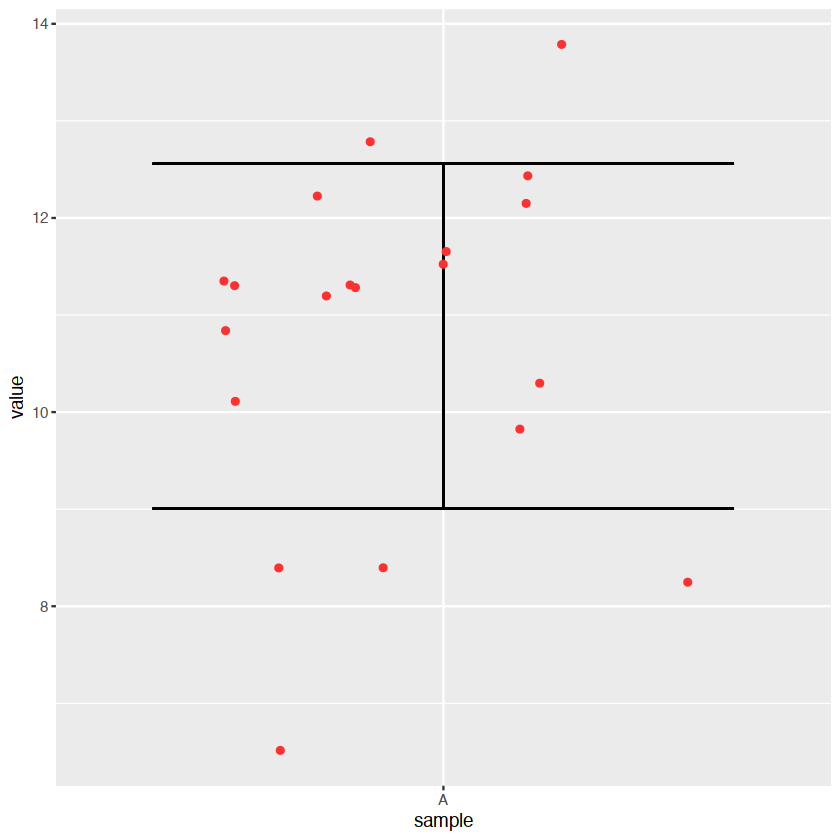

In [4]:
# Load libraries
suppressMessages(library(tidyverse))

# Create dummy data
r_dat <- data.frame(value = rnorm(n = 20, mean = 10, sd = 2),
                    sample = rep("A", 20))

# Create basic plot
ggplot(data = r_dat, aes(x = sample, y = value)) +
  geom_errorbar(aes(ymin = mean(value) - sd(value), ymax = mean(value) + sd(value))) +
  geom_jitter(colour = "firebrick1")

**Figure:** A very basic figure showing confidence intervals (CI) for a random normal distribution.

<div class="alert alert-block alert-success">
    <b>Task:</b> How would we apply this to more than one sample set? Do so now.
</div>

## CI of compared means

AS stated above, we may also use CI to investigate the difference in means between two or more sample sets of data. We have already seen this in Chapter 7, ANOVA, but we shall look at it again here with our now expanded understanding of the concept.

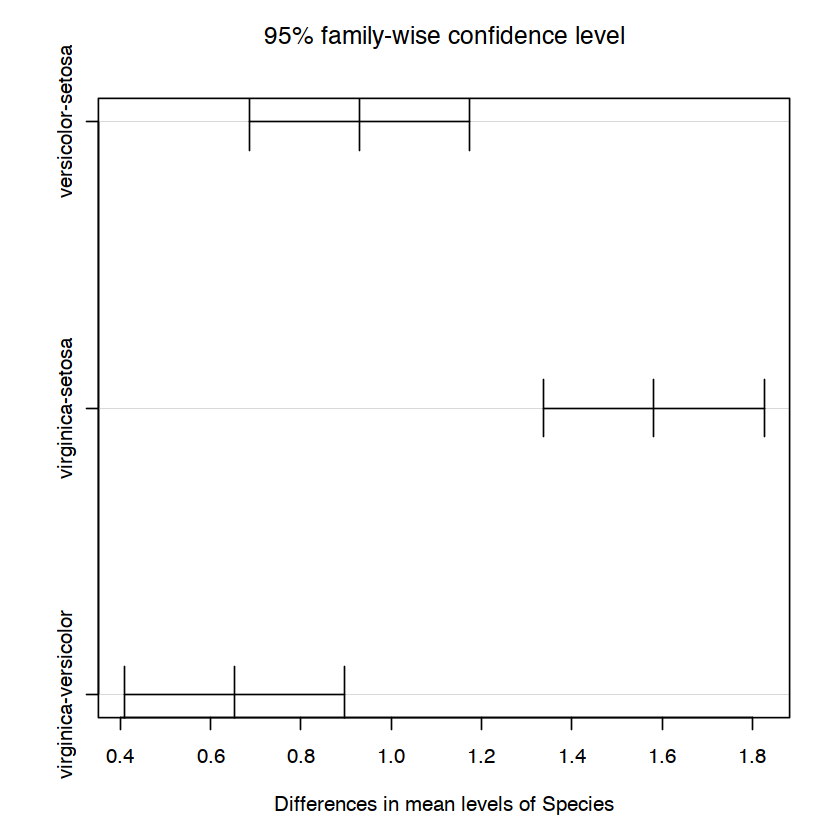

In [5]:
# First calculate ANOVA of seapl length of different iris species
iris_aov <- aov(Sepal.Length ~ Species, data = iris)

# Then run a Tukey test
iris_Tukey <- TukeyHSD(iris_aov)

# Lastly use base R to quickly plot the results
plot(iris_Tukey)

**Figure:** Results of a post-hoc Tukey test showing the confidence interval for the effect size between each group.

<div class="alert alert-block alert-success">
<b>Task:</b> Judging from the figure above, which species have significantly different sepal lengths?
</div>

## Harrell plots

The most complete use of CI that we have seen to date is the Harrell plot. This type of figure shows the distributions of each sample set in the data as boxplots in a lower panel. In the panel above those boxplots it then lays out the results of a post-hoc Tukey test. This very cleanly shows both the raw data as well as high level statistical results of the comparisons of those data. Thanks to the magic of the Internet we may create these figures with a single line of code. This does however require that we load several new libraries.

$gg


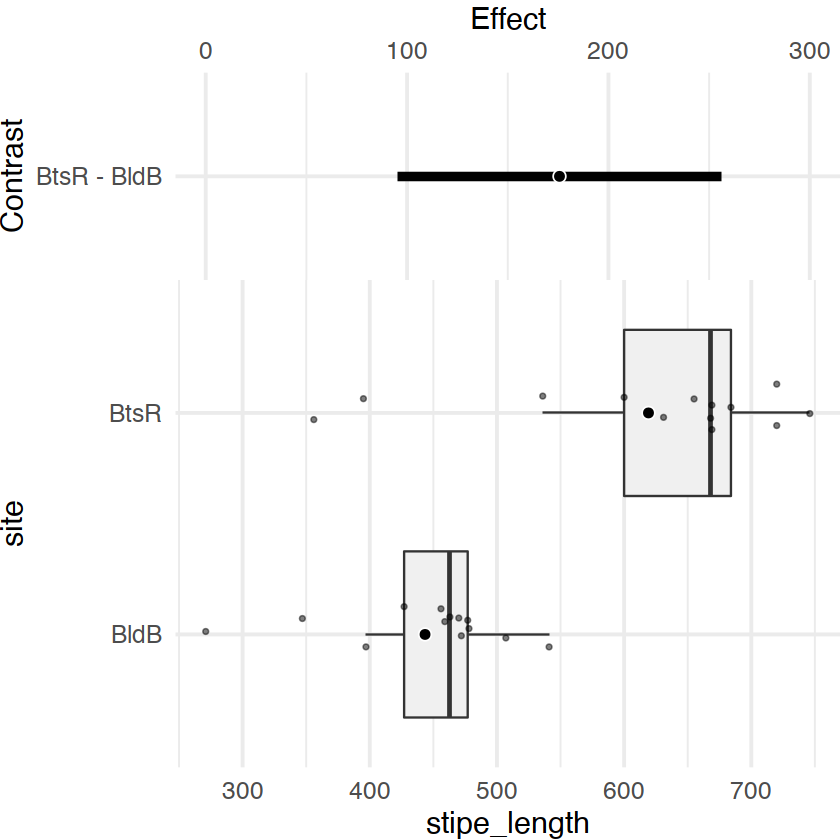

In [13]:
library(emmeans)
library(data.table)
library(broom)
suppressMessages(library(Hmisc))
library(car)
library(cowplot)
source("../data/fit_model.R")
source("../data/make_formula_str.R")
source("../data/HarrellPlot.R")

# Load data
ecklonia <- read.csv("../data/ecklonia.csv")

# Create Harrell Plot
HarrellPlot(x = "site", y = "stipe_length", data = ecklonia, short = T)[1]

**Figure:** Harrell plot showing the distributions of stipe lengths (cm) of the kelp _Ecklonia maxima_ at two different sites in the bottom panel. The top panel shows the confidence interval of the effect of the difference between these two sample sets based on a post-hoc Tukey test.

<div class="alert alert-block alert-success">
<b>Task:</b> There are a lot of settings for `HarrePlot()`, what do some of them do?
</div>

The above figure shows that the CI of the difference between stipe lengths (cm) at the two sites does not cross 0. This means that there is a significant difference between these two sample sets. But let's run a statistical test anyway to check the results.

In [14]:
# Testing assumptions
ecklonia %>% 
  group_by(site) %>% 
  summarise(stipe_length_var = var(stipe_length),
            stipe_length_Norm = as.numeric(shapiro.test(stipe_length)[2]))
# We fail both assumptions...

# non-parametric test
wilcox.test(stipe_length ~ site, data = ecklonia)

site,stipe_length_var,stipe_length_Norm
<chr>,<dbl>,<dbl>
Batsata Rock,14682.641,0.01278574
Boulders Beach,4970.436,0.05891928


Warning message in wilcox.test.default(x = c(720L, 600L, 720L, 395L, 669L, 684L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  stipe_length by site
W = 146, p-value = 0.001752
alternative hypothesis: true location shift is not equal to 0


The results of our Wilcox rank sum test, unsurprisingly, support the output of `HarrelPlot()`.

## Exercises

<div class="alert alert-block alert-success">
<b>Exercise 1</b> Load a new dataset and create a Harrell plot from it based on values of your choosing. What does the Harrell plot show?
</div>

<div class="alert alert-block alert-success">
<b>Exercise 2</b>
</div>